In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data = pd.read_csv('latencies.csv')
data["latency"] = data['end'] - data['start']
data.groupby("type")["latency"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
cameraonly,30.0,0.113667,0.012669,0.092,0.104,0.1140,0.125,0.138
delay,30.0,0.080133,0.004400,0.070,0.076,0.0795,0.083,0.088
prediction,30.0,0.039033,0.005000,0.030,0.037,0.0380,0.042,0.050


c:\Users\James\Files\git\dpoint\python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\James\Files\git\dpoint\python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\James\Files\git\dpoint\python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\James\Files\git\dpoint\python\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

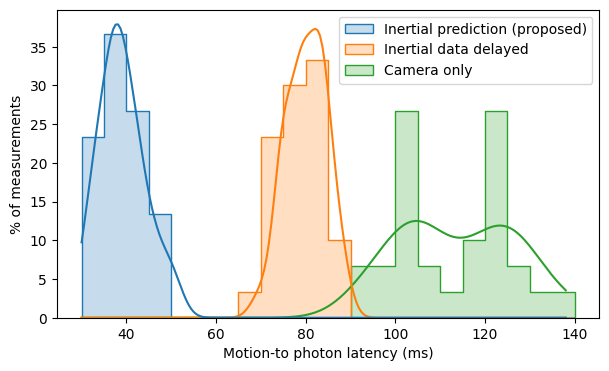

In [11]:
from matplotlib.axes import Axes
import seaborn as sns
plt.figure(figsize=(7,4))
ax: Axes = sns.histplot(data,
    x=data["latency"]*1000,
    hue=data["type"].replace({
        "cameraonly": "Camera only",
        "delay": "Inertial data delayed",
        "prediction": "Inertial prediction (proposed)"}),
    stat="percent",
    common_norm=False,
    element="step",
    fill=True,
    binwidth=5,
    kde=True)
ax.set_xlabel("Motion-to photon latency (ms)")
ax.set(ylabel="% of measurements")
leg = ax.get_legend()
leg.set_title("")
leg.set_loc('upper right')
plt.savefig('latency-histogram.pdf', dpi=300)

In [4]:
# bins = range(0,140,10)
# plt.hist([latencies_predict, latencies_delay, latencies_cameraonly],
#     bins=bins,
#     histtype='bar',
#     label=['Inertial prediction',  'Inertial delay', 'Camera only'],
#     )
# # plt.hist(latencies_b, bins=7, histtype='step', label='Inertial delay')
# plt.legend(loc='upper right')
# plt.xlabel('Motion-to-photon latency (ms)')
# plt.ylabel('Count')
# plt.savefig('latency-histogram.pdf', dpi=300)